In [125]:
%matplotlib inline
import random 
import torch 
from d2l import torch as d2l 

In [126]:
def synthetic_data(w,b,num_examples):
    X = torch.normal(0,1,(num_examples,len(w)))
    y = torch.matmul(X,w) + b
    y += torch.normal(0,0.01,y.shape)
    return X,y.reshape((-1,1))

In [127]:
true_w = torch.tensor([2,-3.4])
true_b = 4.2
features,labels = synthetic_data(true_w,true_b,1000)

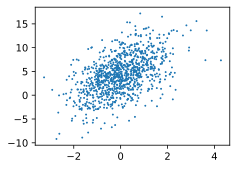

In [128]:
d2l.set_figsize()
d2l.plt.scatter(features[:,0],labels,1)

#### 读取数据集

In [129]:
def data_iter(batch_size,features,labels):
    num_examples = len(features)
    indices = list(range(num_examples))

    #这些样本是随机读取的，没有特定顺序
    random.shuffle(indices)

    for i in range(0,num_examples,batch_size):
        batch_indices = torch.tensor(
            indices[i:min(i+batch_size,num_examples)])
        #生成器
        yield features[batch_indices],labels[batch_indices]

In [130]:
batch_size=10
for X,y in data_iter(batch_size,features,labels):
    print(X,'\n',y)
    break

tensor([[ 0.5378,  0.3385],
        [-0.8054, -0.1304],
        [-0.3751, -1.6670],
        [ 1.7067,  0.3098],
        [-1.0155, -0.1845],
        [ 1.6488, -0.6250],
        [-1.1578,  1.3233],
        [-2.6270, -0.2993],
        [-2.1718,  0.1479],
        [-1.0445, -1.3351]]) 
 tensor([[ 4.1248],
        [ 3.0267],
        [ 9.1211],
        [ 6.5676],
        [ 2.7932],
        [ 9.6203],
        [-2.6094],
        [-0.0375],
        [-0.6378],
        [ 6.6712]])


In [131]:
#初始化模型参数
w=torch.normal(0,0.01,size=(2,1),requires_grad=True)
b=torch.zeros(1,requires_grad=True)

In [132]:
#定义模型
def linreg(X,w,b):
    return torch.matmul(X,w)+b

In [133]:
#损失函数
def squared_loss(y_hat,y):
    return (y_hat-y.reshape(y_hat.shape))**2/2

In [134]:
#优化算法
def sgd(params,lr,batch_size):
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr*param.grad/batch_size 
            #梯度值归零
            param.grad.zero_()



In [135]:
#训练
lr = 0.03 
num_epochs = 3
net = linreg
loss = squared_loss

In [136]:
for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l = loss(net(X,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l = loss(net(features,w,b),labels)
        print(f'epoch {epoch+1},loss {float(train_l.mean()):f}')

epoch 1,loss 0.029375
epoch 2,loss 0.000104
epoch 3,loss 0.000051


In [137]:
#误差
print(f'w的估计误差：{true_w-w.reshape(true_w.shape)}')
print(f"b的估计误差： {true_b-b}")

w的估计误差：tensor([-4.3368e-04,  1.3828e-05], grad_fn=<SubBackward0>)
b的估计误差： tensor([0.0007], grad_fn=<RsubBackward1>)
